# An Introduction to interacting with nifti volumes in python.

## Goals

1. Demonstrate data input and output with nibabel.
2. Demonstrate interacting with nifi headers.
3. Demonstrate manipulating image volumes.

Nibabel and Nilearn are two very useful packages for neuroimaging data manipulation. 

[Nibabel](https://nipy.org/nibabel/) is a package designed for interacting with neuroimaging data in common formats.

[Nilearn](https://nilearn.github.io/) is a much broader package that has the functionality to perform machine learning. There are examples of all the wonderful things you can do [here](https://nilearn.github.io/auto_examples/index.html). However, I will not be covering machine learning here. I will only be talking about some of the useful functions that nilearn has for plotting/manipulating data.

## Data input and output.

First, let's set the path to where our data are located. If you took part in the nipype tutorial, then this is the same data we used before.

In [1]:
inputpath='/opt/neurohack/examp/bold.nii.gz'
atlaspath='/opt/neurohack/examp/maxprob_vol_rh.nii.gz'

Now set the path to the outputs. You will need to change my username for yours.

In [2]:
outputpath='/home/users/yg916972/Desktop'

To help us interpret what comes below, I am going to plot the data.

In [3]:
import nilearn
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
firstim=image.index_img(inputpath, 0)
display=plotting.plot_anat(firstim)
display
plt.show()

/opt/anaconda/envs/neurohack/lib/python2.7/site-packages/nilearn/__init__.py:73: DeprecationWarning: Python2 support is deprecated and will be removed in the next release. Consider switching to Python 3.6 or 3.7.
  _python_deprecation_warnings()


<Figure size 660x260 with 4 Axes>

We can see that this is a small FOV volume recorded from the posterior of the brain.

## How do I get nifti data into python?

To do this, we need to import nibabel, and call the 'load' function to load our data into memory.

In [4]:
import nibabel as nib

In [5]:
img1=nib.load(inputpath)

In [6]:
img1

We see that this is a nifti image. Nibabel actually seperates this file into 3 components, *the data*, *the header*, and *the affine*.

Let's start with the data.

To access the data itself, we call the *get_data* function.

In [7]:
data=img1.get_data()

## How do I access different parts of the data?

It is first important to learn something about the structure of the data. To do this, we can ask how many dimensions it has.

In [8]:
data.shape

(97, 115, 97, 120)

In [9]:
type(data)

numpy.ndarray

We see that the data has 4 dimensions. It is a functional image. The first 3 are space dimensions (X,Y,Z) and the final one is time. 

Thus our data are 97x115x97 voxels with 120 volumes.

Our data are in a *numpy* array. This is just the standard format in which arrays are stored in python. It is not much different to how data are stored in multidimensional arrays in matlab or R.

Therefore, we can access the first volume of our data as follows.

In [10]:
firstvol=data[:,:,:,0]
firstvol.shape

(97, 115, 97)

Here, the colons denote that we want 'all of' the x,y and z dimensions, but the 0 indicates that we only want the first volume. Note that, in python, indexing starts at 0.

Therefore, if we ask for the 120th volume, as follows.

In [11]:
lastvol=data[:,:,:,120]

IndexError: index 120 is out of bounds for axis 3 with size 120

We will get an error. Since our indexing starts at 0, the 120th volume is at index 119.

In [12]:
lastvol=data[:,:,:,119]

This can be a little confusing, since the way python does indexing is different to R, MATLAB etc.

Now let's suppose that we wanted to access one slice of the data in the x dimension, we would do this as follows.

Here for instance, we take slice 40 in the X dimension, from the first volume. 

In [13]:
myslice=data[40,:,:,0]

In [14]:
import matplotlib.pyplot as plt

Since a slice is 2 dimensional, we can view it as as we would any other image.

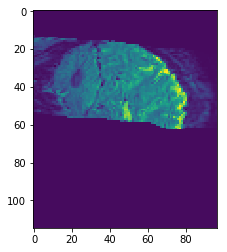

In [15]:
plt.imshow(myslice)

Often, we may be quite interested in plotting data over time.

Let's say for instance, we wanted to plot data from an individual voxel over the course of the run.

Here, we would populate the first 3 dimensions with an index to indicate the voxel we want, but add a colon in the time dimension to indicate we want the whole timeseries. 

In [16]:
ts=data[58,35,24,:]

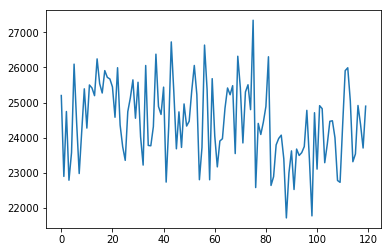

In [17]:
plt.plot(ts)

## How do I perform arithmetic on volumes?

Often, we may want to perform some arithmetic on functional volumes. For instance, sometimes it is useful to make a mean functional image.

Since our data are in numpy format, we can use numpy functions to manipulate them. Therefore, we can simply ask for the mean, specifying that we want to average over the time dimension.

In [18]:
import numpy as np
meanvol=np.mean(data,axis=3) # Time is the 3rd dimension
meanvol.shape

(97, 115, 97)

## How can I save nifti files?

Nibabel also allows you to save nifit files. For instance, we can save our mean functional volume to a nifti image as follows.

In [19]:
import os
new_img = nib.Nifti1Image(meanvol,affine=img1.affine,header=img1.header)
fname=os.path.join(outputpath,'meanvol.nii.gz')
nib.save(new_img,fname)

Notice that, in order to save to a nifti file, we also need to specify 'header' and 'affine' information (More on this in a moment).

Now we plot our mean functional image

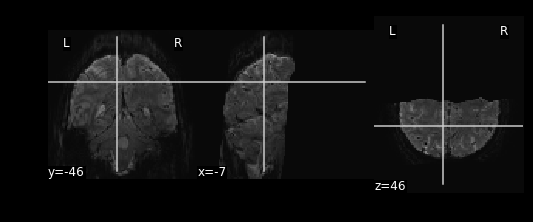

In [20]:
display=plotting.plot_anat(fname)
plt.show()

In addition to caculating a mean over time, we may also want to calculate a mean across 2 functional runs. To do this, we would do as follows.

Note that we only have 1 set of data and so here we are just averaging across two of the same run (ordinarily, of course, we would average across two different runs).

In [21]:
runs = [None]*2 # Make an empty list 
runs[0]=data # Data from the first run
runs[1]=data # Data from the second run
runs=np.array(runs)

In [22]:
runs.shape

(2, 97, 115, 97, 120)

Now we have a new numpy array, with the run number as a new first axis. Therefore, we just have to average across this new axis to average the data across runs. 

In [23]:
run_average=np.mean(runs,axis=0)

In [24]:
run_average.shape

(97, 115, 97, 120)

## How do I interact with the information stored in the nifti header?

In order to access the nifti header, we do as follows.

In [25]:
print(img1.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : r
dim_info        : 0
dim             : [  4  97 115  97 120   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  2.  2.  2.  1.5 1.  1.  1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 251009.53
cal_min         : -21153.723
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.1.12).
aux_file        : 
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.5
qoffset_y       : -132.

Here we see a whole bunch of fields. Here I define a function for getting the most important stuff.

In [26]:
def getniftibits(file):
    import pandas as pd
    
    nifti = nib.load(file)
    VOXSIZE = nifti.header['pixdim'][1:4]
    SHAPE= (nifti.header['dim'][1:5])
    TR = (nifti.header['pixdim'][4:5])
    VOXFRAME=pd.DataFrame(VOXSIZE)
    VOXFRAME=VOXFRAME.T
    SHAPEFRAME=pd.DataFrame(SHAPE)
    SHAPEFRAME=SHAPEFRAME.T
    VOXFRAME.columns=['VoxsizeX','VoxsizeY','VoxsizeZ']
    SHAPEFRAME.columns=['ShapeX','ShapeY','ShapeZ','Volumes']
    CFRAMEi=pd.concat([VOXFRAME,SHAPEFRAME],axis=1)
    CFRAMEi['TR'] = TR 
    return(CFRAMEi)

In [27]:
v=getniftibits(inputpath)
v

,VoxsizeX,VoxsizeY,VoxsizeZ,ShapeX,ShapeY,ShapeZ,Volumes,TR
0,2.0,2.0,2.0,97,115,97,120,1.5


We can see that the voxel size (mm), dimensions, repetition time (s) and number of volumes are all stored in here. 

The *srow* data describe affine transformations that explain how our voxel data relate to positions relative to the magnet isocentre. You can read more on this [here](https://nipy.org/nibabel/coordinate_systems.html) and [here](https://nilearn.github.io/auto_examples/04_manipulating_images/plot_affine_transformation.html#sphx-glr-auto-examples-04-manipulating-images-plot-affine-transformation-py)

This affine information can also be accessed more directly as follows.

In [28]:
img1.affine

array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])

## How do I resample images?

Let's suppose that we wanted to resample some data.

A possible reason for this is that we have some functional data sampled in MNI 2mm space and we want to know what voxels correspond to regions of interest in an atlas.

Unfortunately, our atlas is in MNI 1mm space. Therefore, it may make sense to downsample the atlas into the same space as our data. 

To do this, we would define our MNI 152 in 2mm space as a template (nilearn actually has its own copy of this).

In [29]:
from nilearn.datasets import load_mni152_template
template = load_mni152_template()

In [30]:
template.shape

(91, 109, 91)

We would then define our atlas.

In [31]:
atlas=nib.load(atlaspath)
atlas.shape

(182, 218, 182)

This is in MNI 152 1mm space

We would then use the nilearn utility 'resample_to_img' to sample our atlas into 2mm space.

In [32]:
resampled_img = image.resample_to_img(atlas, template)

In [33]:
resampled_img.shape

(91, 109, 91)

Our atlas is now in the space that we want. And we can then save it as follows.

In [34]:
fname=os.path.join(outputpath,'resampled.nii.gz')
nib.save(resampled_img,fname)

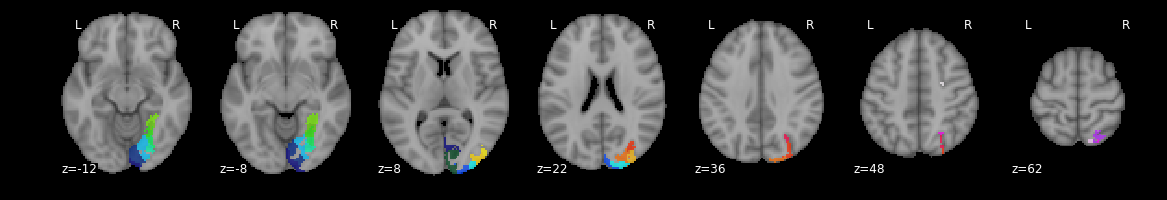

In [35]:
from nilearn.plotting import plot_roi

plot_roi(resampled_img,template, display_mode='z', cut_coords=7)

Here, we plot the regions of interest onto the MNI brain.

## Summary

This has been a brief tour of manipulating neuroimaging data using python. There are plenty more advanced things to learn and many more useful utilities, particularly with nilearn.

To be continued....